In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("eval_ckpt200_s1.csv")
display(df)

#read
obs_columns = [f'obs{i}' for i in range(15)]
obs_array = df[obs_columns].to_numpy()

obs_array = np.repeat(obs_array, repeats=3, axis=1) #repeat 3 times to simulate hisotry 3
obs_array.shape

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs5,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14
0,0,-2.238166e-11,-5.941898e-12,0.079258,0.251740,0.003501,-0.000443,2.798463,-1.571505e-09,-1.797315e-09,...,-2.437489e-08,1.673473e-09,5.706091e-10,8.556214e-09,0.336436,-0.941706,-0.992651,0.121015,-0.441498,0.897262
1,1,4.151808e-04,-2.026951e-04,0.077789,0.246414,-0.008888,0.002299,2.745703,5.375661e-02,-2.491447e-02,...,-5.499380e-02,-6.498055e-02,3.013178e-02,-1.765618e-01,0.385629,-0.922654,-0.992651,0.121015,-0.445654,0.895205
2,2,1.842976e-03,-7.611878e-04,0.076208,0.231608,-0.047103,0.011834,2.585607,1.638929e-01,-5.488041e-02,...,-1.255759e-01,-1.703579e-01,9.743586e-02,-4.535354e-01,0.527781,-0.849381,-0.992651,0.121015,-0.462134,0.886810
3,3,4.354573e-03,-1.411093e-03,0.073841,0.214330,-0.104681,0.028913,2.351134,2.377572e-01,-4.792890e-02,...,-1.167574e-01,-2.106180e-01,1.468763e-01,-5.449964e-01,0.710676,-0.703520,-0.992651,0.121015,-0.493429,0.869786
4,4,7.444289e-03,-1.860356e-03,0.069743,0.202897,-0.166866,0.050412,2.105138,2.735305e-01,-2.768908e-02,...,-7.564150e-02,-2.170631e-01,1.696201e-01,-5.472675e-01,0.860604,-0.509275,-0.992651,0.121015,-0.527619,0.849481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,-6.757321e+00,2.927528e+00,0.050254,-2.810925,0.749816,-1.020481,-13.313510,-7.808235e-04,-7.338750e-04,...,-1.287526e-03,1.116145e-04,-4.605293e-04,-1.300910e-03,-0.679543,0.733636,-0.002810,-0.999996,0.488113,0.872780
3996,3996,-6.757319e+00,2.927515e+00,0.050263,-2.810734,0.749785,-1.020440,-13.313768,9.710785e-04,-8.683668e-04,...,5.592821e-04,8.913495e-05,2.081722e-03,-3.093235e-04,-0.679732,0.733460,-0.002810,-0.999996,0.488162,0.872753
3997,3997,-6.757320e+00,2.927506e+00,0.050267,-2.810579,0.749694,-1.020581,-13.313968,-2.796165e-04,-4.551396e-04,...,1.620300e-04,2.201056e-04,-4.889729e-04,-4.249508e-04,-0.679879,0.733325,-0.002810,-0.999996,0.488144,0.872763
3998,3998,-6.757324e+00,2.927509e+00,0.050262,-2.810535,0.749740,-1.020712,-13.314054,-6.557492e-05,5.848612e-04,...,-3.410222e-04,-4.147621e-04,-2.209556e-04,-4.936610e-04,-0.679942,0.733266,-0.002810,-0.999996,0.488030,0.872827


(4000, 45)

Text(0.5, 0, 'Time (s)')

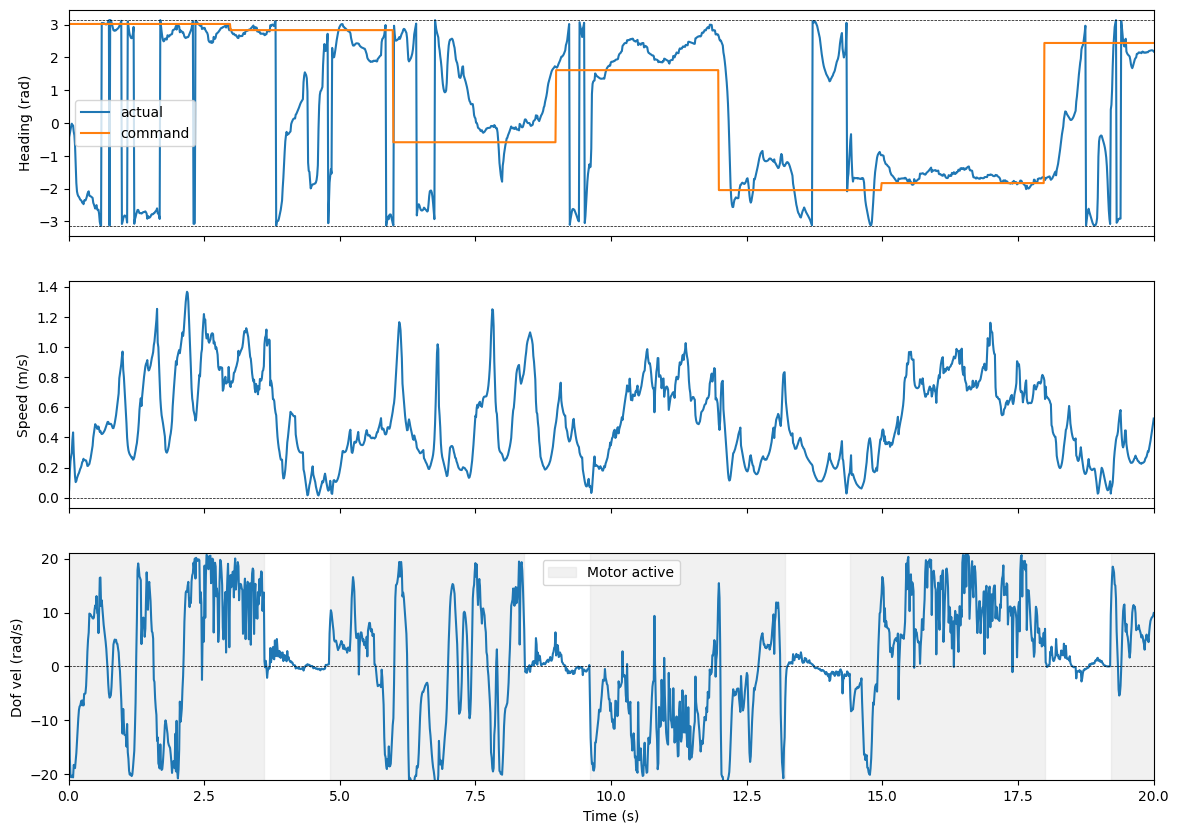

In [7]:
dt = 0.012
heading = np.arctan2(df['vel1'], df['vel0'])
speed = np.linalg.norm(df[['vel0', 'vel1']], axis=1)

des_heading = np.arctan2(df['obs12'], df['obs11']) 

# heading = np.unwrap(heading)
# diff = heading - des_heading
# wrapped_diff = (diff+np.pi)//(2*np.pi)
# # Add the wrapped difference back to angle2
# des_heading = des_heading + wrapped_diff*2*np.pi

fig, axs = plt.subplots(3,1, sharex=True, figsize=(14,10))
axs[0].plot(np.arange(len(df))*dt, heading, label='actual')
axs[0].plot(np.arange(len(df))*dt, des_heading, label='command')
axs[0].axhline(-np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].axhline(np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].set_ylabel('Heading (rad)')
axs[0].legend()


axs[1].plot(np.arange(len(df))*dt, speed)
axs[1].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[1].set_ylabel('Speed (m/s)')


action_filtered = np.zeros(len(df))
alpha = 0.6
for i in range(1, len(df)):
    action_filtered[i] = action_filtered[i-1]*alpha + df['action'][i]*(1-alpha)

axs[2].plot(np.arange(len(df))*dt, df['obs8']*37.5)
# axs[2].plot(np.arange(len(df))*dt, df['action'])
# axs[2].plot(np.arange(len(df))*dt, action_filtered)
axs[2].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[2].set_ylabel('Dof vel (rad/s)')
axs[2].set_xlim(0,20)

# Create mask for the colored region
episode_length = np.arange(len(df))
mask = ((episode_length % 400) > 0) & ((episode_length % 400) <= 300)

# Plot shaded region
axs[2].fill_between(np.arange(len(df))*dt, -100, 100, 
                    where=mask, 
                    color='lightgray', 
                    alpha=0.3,
                    label='Motor active')
axs[2].set_ylim(-21, 21) # Set reasonable y-limits
axs[2].legend()



axs[-1].set_xlabel('Time (s)')

/tmp/ipykernel_1705284/529650738.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,2000)


(1.1020493850140642, 2000)

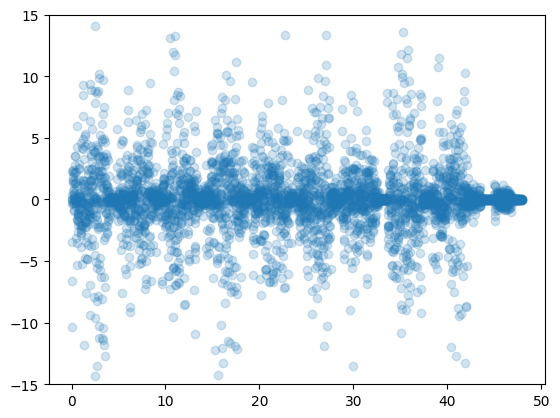

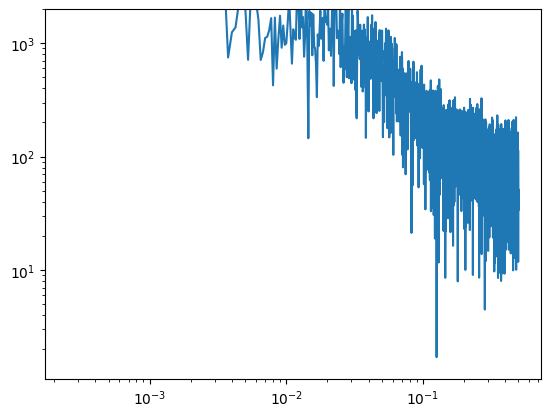

In [6]:
dofvel = df['obs8']*37.5
diffdofvel = np.diff(dofvel,prepend=0)

energy = diffdofvel**2
energy = np.cumsum(energy)

plt.figure()
plt.scatter(np.arange(len(df))*dt, diffdofvel, alpha=0.2)
plt.ylim(-15,15)

#FFT of dofvel
fft = np.fft.fft(dofvel)
frequencies = np.fft.fftfreq(len(dofvel))
plt.figure()
# plt.plot(frequencies, np.abs(fft))
#just the positive frequencies
plt.plot(frequencies[frequencies>0], np.abs(fft[frequencies>0]))
#make loglog
plt.xscale('log')
plt.yscale('log')
plt.ylim(0,2000)

